# Лабораторная работа 5

* Собрать фото 3 людей
* Обучить нейронку для хорошего результата на новых фотках

In [1]:
import mtcnn
print(mtcnn.__version__)

import numpy as np
import matplotlib.pyplot as pyplot
from mtcnn.mtcnn import MTCNN as MTCNN
import cv2
from PIL import Image

0.1.0


In [2]:

def extract_face(fileName, required_size=(224,224), resize=False):
    #pixels = pyplot.imread(fileName)
    print("extract_face::fileName:" + fileName)
    pixels = cv2.cvtColor(cv2.imread(fileName), cv2.COLOR_BGR2RGB)
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    if resize:
        image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

def print_image(img):
    if isinstance(img, str):
        img = pyplot.imread(img)
    pyplot.imshow(img)
    pyplot.show()

In [3]:
pathToCheckImg = "/home/alex/Downloads/bmstuML/faces/2/5.png"

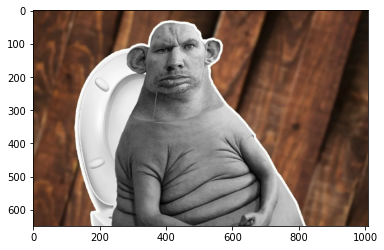

In [4]:
print_image(pathToCheckImg)

extract_face::fileName:/home/alex/Downloads/bmstuML/faces/2/5.png


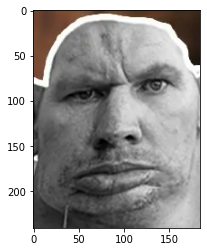

In [5]:
print_image(extract_face(pathToCheckImg))

Произошло пожилое детектирование

In [6]:
from keras.models import Sequential
from keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D,Dropout, Flatten, Activation, Dense

model = Sequential()

model.add (ZeroPadding2D((1,1), input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add (ZeroPadding2D((1,1)))

model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add (MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))

model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add (MaxPooling2D((2,2), strides=(2,2)))


model.add(ZeroPadding2D((1,1)))

model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add (ZeroPadding2D((1,1)))

model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add (ZeroPadding2D((1,1)))

model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add (MaxPooling2D((2,2), strides=(2,2)))

model.add (ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add (ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add (MaxPooling2D((2,2), strides=(2,2)))


model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model .add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model .add (MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model .add (Dropout (0.5) )
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model .add (Dropout (0.5) )
model .add(Convolution2D(2622, (1, 1)))
model.add (Flatten ())
model .add(Activation('softmax'))

Скачаем готовые веса: https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view

In [7]:
from keras.models import model_from_json
weightPath  = "/home/alex/Downloads/vgg_face_weights.h5"
model.load_weights(weightPath)


In [8]:
from keras import Model

final_layer = Dense(3, activation="softmax") (model.layers[-2].output)

model = Model(model.inputs, final_layer)
for layer in model.layers[:-1]:
    layer.trainable = False

In [9]:
# скомпилируем сетку
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_input (InputL [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)     

In [11]:
import os

dir1 = "/home/alex/Downloads/bmstuML/faces/1"
dir2 = "/home/alex/Downloads/bmstuML/faces/2"
dir3 = "/home/alex/Downloads/bmstuML/faces/3"

files1 = os.listdir(dir1)
files2 = os.listdir(dir2)
files3 = os.listdir(dir3)


files1 = [file for file in files1 if  ".png" in file]
files2 = [file for file in files2 if  ".png" in file]
files3 = [file for file in files3 if  ".png" in file]

print(files2)

['1.png', '5.png', '8.png', '2.png', '9.png', '12.png', '13.png', '17.png', '7.png', '16.png', '3.png', '4.png', '15.png', '11.png', '6.png', '18.png', '20.png', '10.png', '19.png']


In [13]:
images1 = [extract_face(os.path.join(dir1,i), resize=True) for i in files1]
images2 = [extract_face(os.path.join(dir2,i), resize=True) for i in files2]
images3 = [extract_face(os.path.join(dir3,i), resize=True) for i in files3]

extract_face::fileName:/home/alex/Downloads/bmstuML/faces/1/1.png
extract_face::fileName:/home/alex/Downloads/bmstuML/faces/1/5.png
extract_face::fileName:/home/alex/Downloads/bmstuML/faces/1/8.png
extract_face::fileName:/home/alex/Downloads/bmstuML/faces/1/2.png
extract_face::fileName:/home/alex/Downloads/bmstuML/faces/1/9.png
extract_face::fileName:/home/alex/Downloads/bmstuML/faces/1/12.png
extract_face::fileName:/home/alex/Downloads/bmstuML/faces/1/13.png
extract_face::fileName:/home/alex/Downloads/bmstuML/faces/1/17.png
extract_face::fileName:/home/alex/Downloads/bmstuML/faces/1/7.png
extract_face::fileName:/home/alex/Downloads/bmstuML/faces/1/16.png
extract_face::fileName:/home/alex/Downloads/bmstuML/faces/1/3.png
extract_face::fileName:/home/alex/Downloads/bmstuML/faces/1/4.png
extract_face::fileName:/home/alex/Downloads/bmstuML/faces/1/15.png
extract_face::fileName:/home/alex/Downloads/bmstuML/faces/1/11.png
extract_face::fileName:/home/alex/Downloads/bmstuML/faces/1/6.png
extr

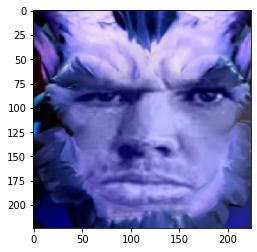

In [14]:
print_image(images2[14])

In [15]:
X_train  = images1[:-2] + images2[:-2] + images3[:-2]
y_train = [[1,0,0]] * len(images1[:-2]) + [[0,1,0]] * len(images2[:-2]) + [[0,0,1]] * len(images3[:-2])

X_test = images1[-2:] + images2[-2:] + images3[-2:]
y_test = [[1,0,0],[1,0,0], [0,1,0],[0,1,0], [0,0,1],[0,0,1]]

Проведем аугментацию тренировочной выборки

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train = test_datagen.flow(np.asarray(X_train), np.asarray(y_train))

In [32]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12297092846695938976
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7518082045673132614
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9220770750197622659
physical_device_desc: "device: XLA_GPU device"
]


Обучаем сетку:

In [17]:
%%time
model.fit_generator(train, epochs=100, verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
2/2 - 3s - loss: 1.0937 - accuracy: 0.4400
Epoch 2/100
2/2 - 3s - loss: 1.0690 - accuracy: 0.7600
Epoch 3/100
2/2 - 5s - loss: 1.0460 - accuracy: 0.9400
Epoch 4/100
2/2 - 3s - loss: 1.0235 - accuracy: 0.9600
Epoch 5/100
2/2 - 5s - loss: 1.0023 - accuracy: 1.0000
Epoch 6/100
2/2 - 5s - loss: 0.9806 - accuracy: 0.9800
Epoch 7/100
2/2 - 6s - loss: 0.9587 - accuracy: 1.0000
Epoch 8/100
2/2 - 3s - loss: 0.9357 - accuracy: 1.0000
Epoch 9/100
2/2 - 5s - loss: 0.9229 - accuracy: 1.0000
Epoch 10/100
2/2 - 5s - loss: 0.8973 - accuracy: 1.0000
Epoch 11/100
2/2 - 3s - loss: 0.8825 - accuracy: 1.0000
Epoch 12/100
2/2 - 5s - loss: 0.8551 - accuracy: 1.0000
Epoch 13/100
2/2 - 5s - loss: 0.8451 - accuracy: 1.0000
Epoch 14/100
2/2 - 5s - loss: 0.8236 - accuracy: 1.0000
Epoch 15/100
2/2 - 3s - loss: 0.8071 - accuracy: 1.0000
Epoch 16/100
2/2 - 5s - loss: 0.7900 - accuracy: 1.0000
Epoch 17/100
2/2 - 3s - loss: 0.7774 

Для дикаприо [1, 0, 0]
Для дедушки  [0, 1, 0]
Для коула    [0, 0, 1]

In [18]:
model.predict(np.asarray(X_test))

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

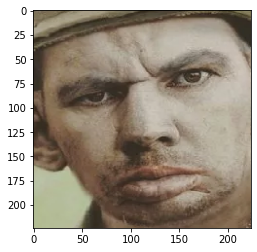

In [19]:
pyplot.imshow(Image.fromarray(X_test[3]))

In [20]:
hard_ded_path_dir = "/home/alex/Downloads/bmstuML/faces/2/difficult"

hard_ded_files = os.listdir(hard_ded_path_dir)

hard_ded_files = [file for file in hard_ded_files if  ".png" in file ]

images_hard_ded = [extract_face(os.path.join(hard_ded_path_dir,i), resize=True) for i in hard_ded_files]



extract_face::fileName:/home/alex/Downloads/bmstuML/faces/2/difficult/1.png
extract_face::fileName:/home/alex/Downloads/bmstuML/faces/2/difficult/2.png
extract_face::fileName:/home/alex/Downloads/bmstuML/faces/2/difficult/3.png


In [21]:
model.predict(np.asarray(images_hard_ded))

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.2040227e-20, 1.0000000e+00]], dtype=float32)

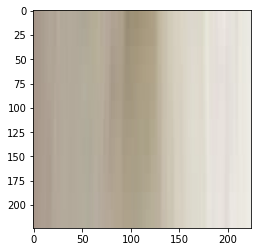

In [22]:
pyplot.imshow(Image.fromarray(images_hard_ded[2]))

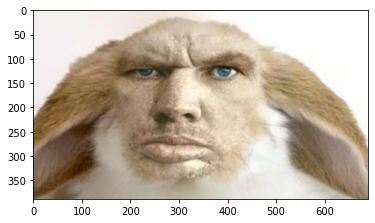

In [23]:
print_image("/home/alex/Downloads/bmstuML/faces/2/difficult/3.png")

Заметим что у дедушки кролика не удалось определить лицо

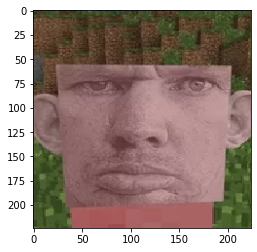

In [24]:
pyplot.imshow(Image.fromarray(images_hard_ded[1]))

Теперь новые фотки дикаприо

In [25]:
hard_dicaprio_path_dir = "/home/alex/Downloads/bmstuML/faces/1/difficult"

hard_dicaprio_files = os.listdir(hard_dicaprio_path_dir)

hard_dicaprio_files = [file for file in hard_dicaprio_files if  ".png" in file ]

images_hard_dicaprio = [extract_face(os.path.join(hard_dicaprio_path_dir,i), resize=True) for i in hard_dicaprio_files]

extract_face::fileName:/home/alex/Downloads/bmstuML/faces/1/difficult/1.png
extract_face::fileName:/home/alex/Downloads/bmstuML/faces/1/difficult/2.png
extract_face::fileName:/home/alex/Downloads/bmstuML/faces/1/difficult/3.png


In [26]:
model.predict(np.asarray(images_hard_dicaprio))

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

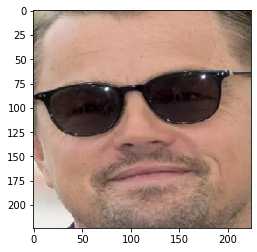

In [27]:
pyplot.imshow(Image.fromarray(images_hard_dicaprio[0]))

Новые фотки 3го чела:

In [29]:
hard_koul_path_dir = "/home/alex/Downloads/bmstuML/faces/3/difficult"

hard_koul_files = os.listdir(hard_koul_path_dir)

hard_koul_files = [file for file in hard_koul_files if  ".png" in file ]

images_hard_koul = [extract_face(os.path.join(hard_koul_path_dir,i), resize=True) for i in hard_koul_files]

extract_face::fileName:/home/alex/Downloads/bmstuML/faces/3/difficult/1.png
extract_face::fileName:/home/alex/Downloads/bmstuML/faces/3/difficult/2.png


In [30]:
model.predict(np.asarray(images_hard_koul))

array([[0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

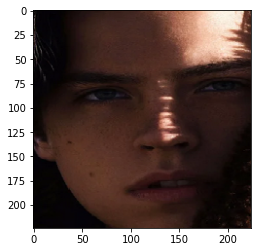

In [31]:
pyplot.imshow(Image.fromarray(images_hard_koul[0]))

Нам удалось обучить модель и удачно предсказать человека по новым фото.